In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [178]:
df= pd.read_csv("USvideos.csv")

In [179]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [180]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [182]:
# Drop the links
df= df.drop(['description','thumbnail_link'], axis=1)

In [183]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%d.%m.%y', errors='coerce')
# Convert the 'date' column to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])
# Change the format to 'dd-mm-yyyy'
df['trending_date'] = df['trending_date'].dt.strftime('%d-%m-%Y')

In [184]:
# Convert 'publish_time' to datetime format
df['publish_time'] = pd.to_datetime(df['publish_time'])
# Create a new column for 'publish_date' in dd/mm/yy format
df['publish_date'] = df['publish_time'].dt.strftime('%d-%m-%Y')
# Extract and change the time format to 'HH:MM AM/PM'
df['publish_time'] = df['publish_time'].dt.strftime('%I:%M %p')

In [185]:
df.isnull().sum()

video_id                      0
trending_date             25574
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
publish_date                  0
dtype: int64

In [186]:
df= df.dropna(subset=['trending_date'])

In [187]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
publish_date              0
dtype: int64

In [188]:
print(sorted(df['category_id'].unique()))

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]


In [189]:
df['category_name'] = pd.Series(dtype='object')

df.loc[df['category_id'] == 1, "category_name"] = 'Film and Animation'
df.loc[df['category_id'] == 2, "category_name"] = 'Autos and Vehicles'
df.loc[df['category_id'] == 10, "category_name"] = 'Music'
df.loc[df['category_id'] == 15, "category_name"] = 'Pets and Animals'
df.loc[df['category_id'] == 17, "category_name"] = 'Sports'
df.loc[df['category_id'] == 19, "category_name"] = 'Travel and Events'
df.loc[df['category_id'] == 20, "category_name"] = 'Gaming'
df.loc[df['category_id'] == 22, "category_name"] = 'People and Blogs'
df.loc[df['category_id'] == 23, "category_name"] = 'Comedy'
df.loc[df['category_id'] == 24, "category_name"] = 'Entertainment'
df.loc[df['category_id'] == 25, "category_name"] = 'News and Politics'
df.loc[df['category_id'] == 26, "category_name"] = 'How to and Style'
df.loc[df['category_id'] == 27, "category_name"] = 'Education'
df.loc[df['category_id'] == 28, "category_name"] = 'Science and Technology'
df.loc[df['category_id'] == 29, "category_name"] = 'Non Profits and Activism'
df.loc[df['category_id'] == 30, "category_name"] = 'Movies'
df.loc[df['category_id'] == 43, "category_name"] = 'Shows'

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_date,category_name
3400,6ZfuNTqbHE8,17-01-2012,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,01:26 PM,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157727,34077,303178,False,False,False,29-11-2017,Entertainment
3401,nx1R-eHSkfM,17-01-2012,The New Snapchat in 60 Seconds,Snapchat,10,02:00 PM,"new snapchat|""version 2""|""snap inc""|""brandnew""...",1894443,0,0,0,True,True,False,29-11-2017,Music
3402,XbuQAbG2AZ0,17-01-2012,"Jay-Z and Dean Baquet, in Conversation",The New York Times,25,02:30 PM,"The New York Times|""NY Times""|""NYT""|""Times Vid...",224270,7006,331,1127,False,False,False,30-11-2017,News and Politics
3403,evhLzq7Gsak,17-01-2012,Matt Lauer Has Been Fired From NBC News | TODAY,TODAY,25,02:42 PM,"The TODAY Show|""TODAY Show""|""TODAY""|""NBC""|""NBC...",1717225,10041,4266,9335,False,False,False,29-11-2017,News and Politics
3404,KXHrCBkIxQQ,17-01-2012,ALL THE MONEY IN THE WORLD - Official Trailer ...,Sony Pictures Entertainment,24,08:00 PM,"mark wahlberg|""marky mark""|""all the money in t...",616077,5816,934,1116,False,False,False,29-11-2017,Entertainment


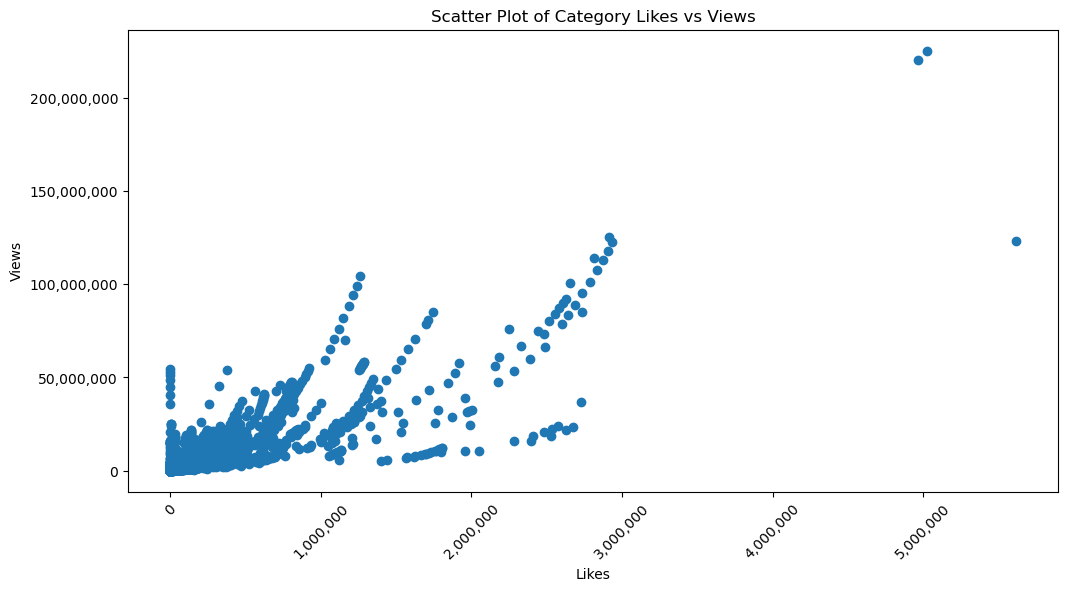

In [190]:
# Scatter plot
from matplotlib.ticker import StrMethodFormatter
plt.figure(figsize=(12, 6))
plt.scatter(df['likes'], df['views'])

plt.title('Scatter Plot of Category Likes vs Views')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.xticks(rotation=45)
#x-axis and y-axis formatting using StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


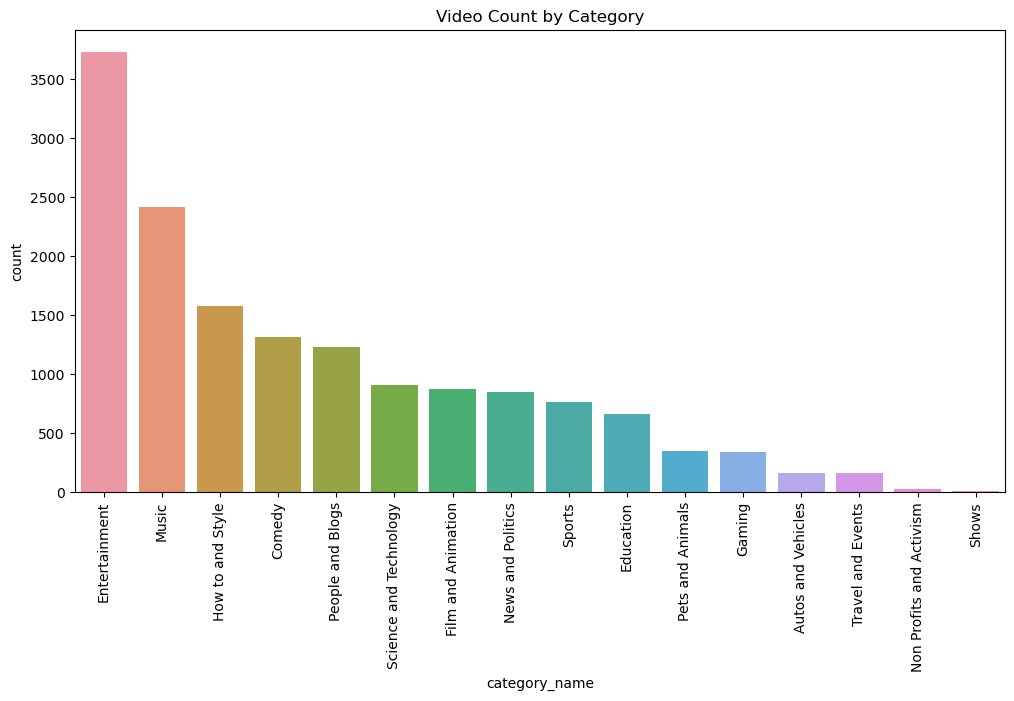

In [191]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category_name', data=df, order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Video Count by Category')
plt.show()

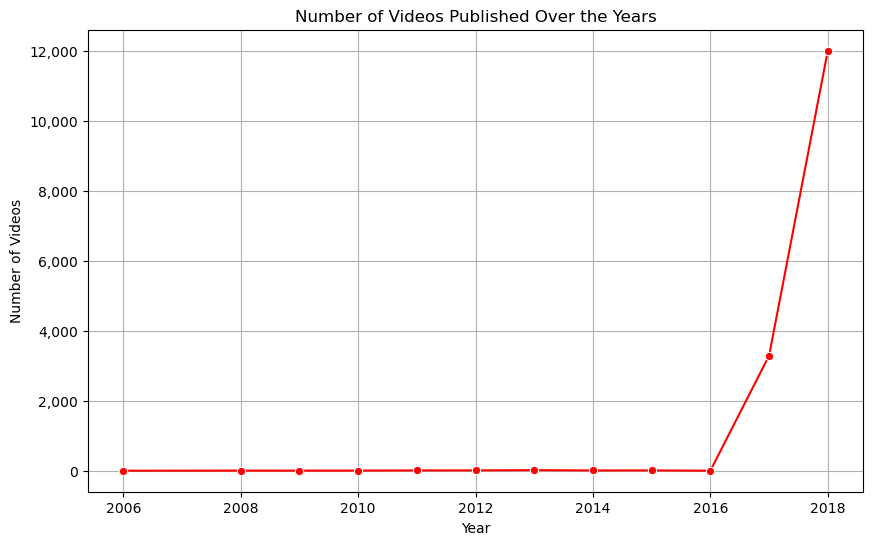

In [230]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Extract the year from the 'publish_date'
df['year'] = pd.to_datetime(df['publish_date'], format='%d-%m-%Y').dt.year

# Count the number of videos published each year
videos_per_year = df.groupby('year').size().reset_index(name='count')

# Plot the line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', data=videos_per_year, marker='o', color='red')
plt.title('Number of Videos Published Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
# Format y-axis to display views as whole numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.show()